In [57]:
import geopandas as gpd
import pickle
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [48]:
tn = gpd.read_file('./tl_2019_47_tract.shp')

In [49]:
gdf = tn[tn.COUNTYFP=='037']

In [50]:
df = pd.read_csv("./nash_ct.csv")

In [51]:
df.head()

,index,GeoID,Percent_Change_Income,Percent_Change_Home,Percent_Change_Education,Percent_Change_Race,eligible,label
0,0,geoId/47037011800,65.356414,91.056218,68.968937,-13.057820,1,1
1,1,geoId/47037015623,1.088139,20.379747,11.109573,-39.465802,0,0
2,2,geoId/47037018700,20.894521,26.870281,3.908037,5.687230,0,0
3,3,geoId/47037018803,23.469099,20.637959,14.960580,-13.885589,0,0
4,4,geoId/47037015617,-1.356019,29.547260,16.719218,6.164154,0,0


In [52]:
geo_ids_to_exclude = [
    "geoId/47037013000",
    "geoId/47037013602",
    "geoId/47037014400",
    "geoId/47037014800",
    "geoId/47037016500",
    "geoId/47037980100",
    "geoId/47037980200"
]
df.loc[df['GeoID'].isin(geo_ids_to_exclude), 'label'] = -1

In [53]:
df['GEOID'] = df['GeoID'].apply(lambda x: x.split('/')[-1])  # Remove the prefix "geoId/"
result = gpd.GeoDataFrame(pd.merge(df, gdf, on='GEOID', how='inner'))

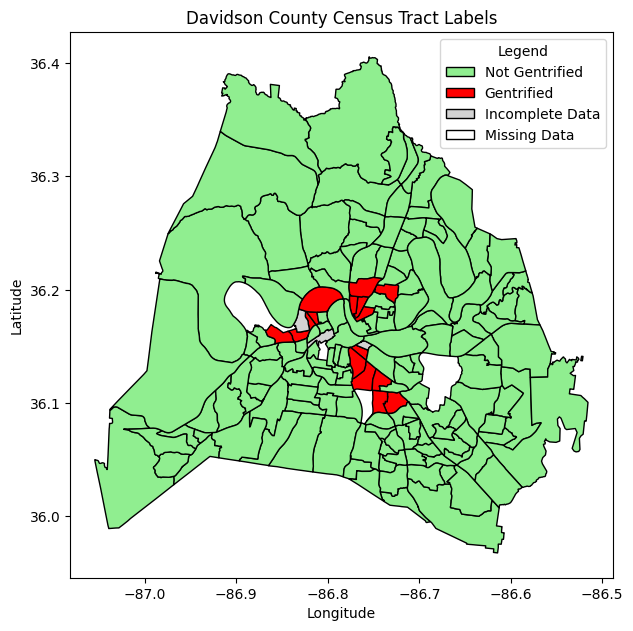

In [70]:
fig, ax = plt.subplots(figsize=(7, 9))  # Set the size of the figure
color_map = {0: 'lightgreen', 1: 'red', -1: 'lightgray'}  # Define a color map for the labels

# Use 'apply' to apply colors based on the 'label' column
result.plot(ax=ax, color=result['label'].map(color_map), edgecolor='black')

# Add titles and labels as necessary
ax.set_title('Davidson County Census Tract Labels')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Create a legend
legend_labels = {'Not Gentrified': 'lightgreen', 'Gentrified': 'red', 'Incomplete Data': 'lightgray', 'Missing Data' : 'white'}
legend_handles = [Patch(facecolor=color, label=label,edgecolor='black') for label, color in legend_labels.items()]
ax.legend(handles=legend_handles, title='Legend')


plt.show()



In [4]:
# # Ensure the blocks are within the same tract if you have multiple tracts
# Load in block groups here 
with open('./block_groups_nash.pkl', 'rb') as file:
    block_groups = pickle.load(file)
import pandas as pd

edge_attr = {}
# keys = ['geoId/47037010103', 'geoId/47037010104', 'geoId/47037010105', 'geoId/47037010106', 'geoId/47037010201', 'geoId/47037010202', 'geoId/47037010301', 'geoId/47037010302', 'geoId/47037010303', 'geoId/47037010401', 'geoId/47037010402', 'geoId/47037010501', 'geoId/47037010502', 'geoId/47037010601', 'geoId/47037010602', 'geoId/47037010701', 'geoId/47037010702', 'geoId/47037010801', 'geoId/47037010802', 'geoId/47037010901', 'geoId/47037010903', 'geoId/47037010904', 'geoId/47037011001', 'geoId/47037011002', 'geoId/47037011100', 'geoId/47037011200', 'geoId/47037011300', 'geoId/47037011400', 'geoId/47037011500', 'geoId/47037011600', 'geoId/47037011700', 'geoId/47037011800', 'geoId/47037011900', 'geoId/47037012100', 'geoId/47037012200', 'geoId/47037012600', 'geoId/47037012701', 'geoId/47037012702', 'geoId/47037012801', 'geoId/47037012802', 'geoId/47037013100', 'geoId/47037013201', 'geoId/47037013202', 'geoId/47037013300', 'geoId/47037013400', 'geoId/47037013500', 'geoId/47037013601', 'geoId/47037013602', 'geoId/47037013700', 'geoId/47037013800', 'geoId/47037013900', 'geoId/47037014200', 'geoId/47037014300', 'geoId/47037015100', 'geoId/47037015200', 'geoId/47037015300', 'geoId/47037015401', 'geoId/47037015402', 'geoId/47037015404', 'geoId/47037015405', 'geoId/47037015501', 'geoId/47037015502', 'geoId/47037015609', 'geoId/47037015610', 'geoId/47037015612', 'geoId/47037015613', 'geoId/47037015614', 'geoId/47037015615', 'geoId/47037015617', 'geoId/47037015618', 'geoId/47037015619', 'geoId/47037015620', 'geoId/47037015622', 'geoId/47037015623', 'geoId/47037015624', 'geoId/47037015625', 'geoId/47037015626', 'geoId/47037015627', 'geoId/47037015628', 'geoId/47037015629', 'geoId/47037015630', 'geoId/47037015631', 'geoId/47037015700', 'geoId/47037015802', 'geoId/47037015803', 'geoId/47037015804', 'geoId/47037015900', 'geoId/47037016000', 'geoId/47037016100', 'geoId/47037016200', 'geoId/47037016300', 'geoId/47037016400', 'geoId/47037016600', 'geoId/47037016700', 'geoId/47037016800', 'geoId/47037016900', 'geoId/47037017000', 'geoId/47037017100', 'geoId/47037017200', 'geoId/47037017300', 'geoId/47037017401', 'geoId/47037017402', 'geoId/47037017500', 'geoId/47037017701', 'geoId/47037017702', 'geoId/47037017800', 'geoId/47037017901', 'geoId/47037017902', 'geoId/47037018000', 'geoId/47037018101', 'geoId/47037018102', 'geoId/47037018201', 'geoId/47037018202', 'geoId/47037018203', 'geoId/47037018301', 'geoId/47037018302', 'geoId/47037018401', 'geoId/47037018404', 'geoId/47037018405', 'geoId/47037018407', 'geoId/47037018408', 'geoId/47037018409', 'geoId/47037018410', 'geoId/47037018500', 'geoId/47037018601', 'geoId/47037018602', 'geoId/47037018700', 'geoId/47037018801', 'geoId/47037018803', 'geoId/47037018804', 'geoId/47037018901', 'geoId/47037018902', 'geoId/47037018904', 'geoId/47037018905', 'geoId/47037019003', 'geoId/47037019004', 'geoId/47037019005', 'geoId/47037019006', 'geoId/47037019105', 'geoId/47037019106', 'geoId/47037019108', 'geoId/47037019109', 'geoId/47037019110', 'geoId/47037019111', 'geoId/47037019112', 'geoId/47037019114', 'geoId/47037019115', 'geoId/47037019116', 'geoId/47037019117', 'geoId/47037019118', 'geoId/47037019200', 'geoId/47037019300', 'geoId/47037019400', 'geoId/47037019500', 'geoId/47037019600']
# keys = ['geoId/47037010103', 'geoId/47037010104', 'geoId/47037010105', 'geoId/47037010106', 'geoId/47037010201', 'geoId/47037010202', 'geoId/47037010301', 'geoId/47037010302', 'geoId/47037010303', 'geoId/47037010401', 'geoId/47037010402', 'geoId/47037010501', 'geoId/47037010502', 'geoId/47037010601', 'geoId/47037010602', 'geoId/47037010701', 'geoId/47037010702', 'geoId/47037010801', 'geoId/47037010802', 'geoId/47037010901', 'geoId/47037010903', 'geoId/47037010904', 'geoId/47037011001', 'geoId/47037011002', 'geoId/47037011100', 'geoId/47037011200', 'geoId/47037011300', 'geoId/47037011400', 'geoId/47037011500', 'geoId/47037011600', 'geoId/47037011700', 'geoId/47037011800', 'geoId/47037011900', 'geoId/47037012100', 'geoId/47037012200', 'geoId/47037012600', 'geoId/47037012701', 'geoId/47037012702', 'geoId/47037012801', 'geoId/47037012802', 'geoId/47037013100', 'geoId/47037013201', 'geoId/47037013202', 'geoId/47037013300', 'geoId/47037013400', 'geoId/47037013500', 'geoId/47037013601', 'geoId/47037013700', 'geoId/47037013800', 'geoId/47037013900', 'geoId/47037014200', 'geoId/47037014300', 'geoId/47037015100', 'geoId/47037015200', 'geoId/47037015300', 'geoId/47037015401', 'geoId/47037015402', 'geoId/47037015404', 'geoId/47037015405', 'geoId/47037015501', 'geoId/47037015502', 'geoId/47037015609', 'geoId/47037015610', 'geoId/47037015612', 'geoId/47037015613', 'geoId/47037015614', 'geoId/47037015615', 'geoId/47037015617', 'geoId/47037015618', 'geoId/47037015619', 'geoId/47037015620', 'geoId/47037015622', 'geoId/47037015623', 'geoId/47037015624', 'geoId/47037015625', 'geoId/47037015626', 'geoId/47037015627', 'geoId/47037015628', 'geoId/47037015629', 'geoId/47037015630', 'geoId/47037015631', 'geoId/47037015700', 'geoId/47037015802', 'geoId/47037015803', 'geoId/47037015804', 'geoId/47037015900', 'geoId/47037016000', 'geoId/47037016100', 'geoId/47037016200', 'geoId/47037016300', 'geoId/47037016400', 'geoId/47037016600', 'geoId/47037016700', 'geoId/47037016800', 'geoId/47037016900', 'geoId/47037017000', 'geoId/47037017100', 'geoId/47037017200', 'geoId/47037017300', 'geoId/47037017401', 'geoId/47037017402', 'geoId/47037017500', 'geoId/47037017701', 'geoId/47037017702', 'geoId/47037017800', 'geoId/47037017901', 'geoId/47037017902', 'geoId/47037018000', 'geoId/47037018101', 'geoId/47037018102', 'geoId/47037018201', 'geoId/47037018202', 'geoId/47037018203', 'geoId/47037018301', 'geoId/47037018302', 'geoId/47037018401', 'geoId/47037018404', 'geoId/47037018405', 'geoId/47037018407', 'geoId/47037018408', 'geoId/47037018409', 'geoId/47037018410', 'geoId/47037018500', 'geoId/47037018601', 'geoId/47037018602', 'geoId/47037018700', 'geoId/47037018801', 'geoId/47037018803', 'geoId/47037018804', 'geoId/47037018901', 'geoId/47037018902', 'geoId/47037018904', 'geoId/47037018905', 'geoId/47037019003', 'geoId/47037019004', 'geoId/47037019005', 'geoId/47037019006', 'geoId/47037019105', 'geoId/47037019106', 'geoId/47037019108', 'geoId/47037019109', 'geoId/47037019110', 'geoId/47037019111', 'geoId/47037019112', 'geoId/47037019114', 'geoId/47037019115', 'geoId/47037019116', 'geoId/47037019117', 'geoId/47037019118', 'geoId/47037019200', 'geoId/47037019300', 'geoId/47037019400', 'geoId/47037019500', 'geoId/47037019600']
for k in block_groups.keys():
    numerical_id = k.split('/')[1][-6:]
    gdf_new = gdf[gdf['TRACTCE'] == numerical_id]
    

    df = block_groups[k]
    df['GEOID'] = df['GeoID'].apply(lambda x: x.split('/')[-1])  # Remove the prefix "geoId/"
    result = gpd.GeoDataFrame(pd.merge(df, gdf_new, on='GEOID', how='inner'))

<Axes: >

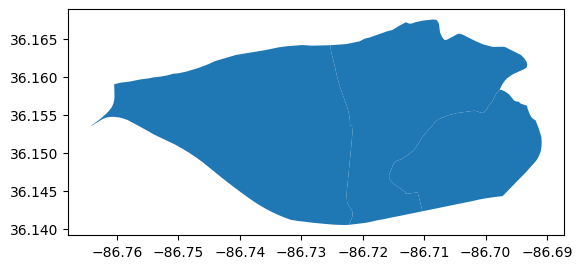

In [6]:
result.plot()